# **1. Function Approximation**

Dataset: (1,1), (2,2), (3,2), (4,5)

**Prediction:** $\hat y = \theta_1 x + \theta_2$  
**MSE:** $J(\theta)=\tfrac{1}{N}\sum_{i=1}^N\big(y^{(i)}-\hat y^{(i)}\big)^2$, with $N=4$.

## Model 1: $\theta=(1,0) $
| x | y | ŷ=θ1·x+θ2 | r=y-ŷ | r² |
|---:|---:|---:|---:|---:|
| 1 | 1 | 1.00 | 0.00 | 0.0000 |
| 2 | 2 | 2.00 | 0.00 | 0.0000 |
| 3 | 2 | 3.00 | -1.00 | 1.0000 |
| 4 | 5 | 4.00 | 1.00 | 1.0000 |

SSE = 2.0000

**MSE J = 0.50000**

## Model 2: $\theta=(0.5,1)$
| x | y | ŷ=θ1·x+θ2 | r=y-ŷ | r² |
|---:|---:|---:|---:|---:|
| 1 | 1 | 1.50 | -0.50 | 0.2500 |
| 2 | 2 | 2.00 | 0.00 | 0.0000 |
| 3 | 2 | 2.50 | -0.50 | 0.2500 |
| 4 | 5 | 3.00 | 2.00 | 4.0000 |

SSE = 4.5000

**MSE J = 1.12500**

## Conclusion
The lower MSE is from **(1, 0)**: 0.50000 vs 1.12500.  
So **(1, 0)** fits this dataset better.

# **2.Random Guessing Practice**

Cost function:  
$J(\theta_1,\theta_2)=8(\theta_1-0.3)^2+4(\theta_2-0.7)^2$

The minimum is at $(0.3,0.7)$ . Below are step-by-step evaluations.

## Step-by-step calculations
| θ1 | θ2 | θ1−0.3 | (θ1−0.3)^2 | 8(θ1−0.3)^2 | θ2−0.7 | (θ2−0.7)^2 | 4(θ2−0.7)^2 | J |
|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| 0.10 | 0.20 | -0.20 | 0.0400 | 0.3200 | -0.50 | 0.2500 | 1.0000 | 1.32000 |
| 0.50 | 0.90 | 0.20 | 0.0400 | 0.3200 | 0.20 | 0.0400 | 0.1600 | 0.48000 |

## Results
$J(0.1,0.2)=1.32000$  
$J(0.5,0.9)=0.48000$  

**Closer to the minimum:** (0.5, 0.9) (lower cost).

## Why random guessing is inefficient
Random guessing explores the parameter space blindly; with a continuous space, the probability of landing near the optimum is tiny, so many evaluations are wasted. Cost contours are elliptical here, and without gradient or curvature information, guesses won't systematically move toward the minimum. Methods like gradient descent exploit the slope to reduce $J$ reliably each step, whereas random guesses have no such directionality.


In [11]:
def J(theta1, theta2):
    return 8*(theta1-0.3)**2 + 4*(theta2-0.7)**2
print(J(0.1,0.2))
print(J(0.5,0.9))

1.3199999999999998
0.4800000000000002


# **3.First Gradient Descent Iteration — Step by Step**
Dataset: (1,3), (2,4), (3,6), (4,5);  $N=4$  

**Prediction:** $\hat y = \theta_1 x + \theta_2$  
**MSE:** $J(\theta)=\tfrac{1}{N}\sum_{i=1}^{N}(y^{(i)}-\hat y^{(i)})^2$  

**Gradients:** $\tfrac{\partial J}{\partial \theta_1}= -\tfrac{2}{N}\sum x^{(i)}(y^{(i)}-\hat y^{(i)})$,  $\tfrac{\partial J}{\partial \theta_2}= -\tfrac{2}{N}\sum (y^{(i)}-\hat y^{(i)})$  
**Update:** $\theta \leftarrow \theta - \alpha \, \nabla J$, with $\alpha=0.01$.

## Start: $\theta^{(0)}=(0,0)$ — predictions, residuals, sums
| x | y | ŷ=θ1·x+θ2 | r=y−ŷ | x·r | r² |
|---:|---:|---:|---:|---:|---:|
| 1 | 3 | 0.000000 | 3.000000 | 3.000000 | 9.000000 |
| 2 | 4 | 0.000000 | 4.000000 | 8.000000 | 16.000000 |
| 3 | 6 | 0.000000 | 6.000000 | 18.000000 | 36.000000 |
| 4 | 5 | 0.000000 | 5.000000 | 20.000000 | 25.000000 |

$\sum r = 18.000000$,  $\sum x r = 49.000000$  
$\Rightarrow\ \nabla J(\theta^0) = \left( -\tfrac{2}{N}\sum xr,\ -\tfrac{2}{N}\sum r \right) = (-24.500000, -9.000000)$  
Update: $\theta^1 = (0,0) - 0.01\cdot\nabla J = (0.245000, 0.090000)$  

$J(\theta^0) = 21.500000$,   $J(\theta^1) = 15.256037$

**Comparison:** $J(\theta^0) = 21.500000 \;\boldsymbol{>}\; J(\theta^1) = 15.256037$, so error decreased after the first update.

## Continue: $\theta^{(1)}$ — predictions, residuals, sums, and update
| x | y | ŷ=θ1·x+θ2 | r=y−ŷ | x·r | r² |
|---:|---:|---:|---:|---:|---:|
| 1 | 3 | 0.335000 | 2.665000 | 2.665000 | 7.102225 |
| 2 | 4 | 0.580000 | 3.420000 | 6.840000 | 11.696400 |
| 3 | 6 | 0.825000 | 5.175000 | 15.525000 | 26.780625 |
| 4 | 5 | 1.070000 | 3.930000 | 15.720000 | 15.444900 |

$\sum r = 15.190000$,  $\sum x r = 40.750000$  
$\Rightarrow\ \nabla J(\theta^1) = (-20.375000, -7.595000)$  
Update: $\theta^2 = \theta^1 - 0.01\cdot\nabla J = (0.448750, 0.165950)$  

$J(\theta^1) = 15.256037$,   $J(\theta^2) = 10.922289$  

**Comparison:** $J(\theta^1) = 15.256037 \;\boldsymbol{>}\; J(\theta^2) = 10.922289$, so error decreased again on the second update.

In [13]:

# Verification with numpy (commented for clarity)
import numpy as np

data = np.array([[1,3],[2,4],[3,6],[4,5]], dtype=float)
X = data[:,0]
Y = data[:,1]
N = len(X)
alpha = 0.01

def J(theta1, theta2):
    yhat = theta1*X + theta2
    return np.mean((Y - yhat)**2)

def gradient(theta1, theta2):
    yhat = theta1*X + theta2
    r = Y - yhat
    grad1 = -(2/N) * np.sum(X*r)
    grad2 = -(2/N) * np.sum(r)
    return grad1, grad2

t1, t2 = 0.0, 0.0
J0 = J(t1, t2)
g1, g2 = gradient(t1, t2)
t1, t2 = t1 - alpha*g1, t2 - alpha*g2
J1 = J(t1, t2)

g1b, g2b = gradient(t1, t2)
t1_next, t2_next = t1 - alpha*g1b, t2 - alpha*g2b
J2 = J(t1_next, t2_next)

print('theta^(1)=', (t1, t2))
print('theta^(2)=', (t1_next, t2_next))
print('J(theta^(0))=', J0)
print('J(theta^(1))=', J1)
print('J(theta^(2))=', J2)


theta^(1)= (np.float64(0.245), np.float64(0.09))
theta^(2)= (np.float64(0.44875), np.float64(0.16595))
J(theta^(0))= 21.5
J(theta^(1))= 15.256037499999998
J(theta^(2))= 10.92228893375


# **4.Compare Random Guessing vs One Gradient Descent Step**

Dataset: (1,2), (2,2), (3,4), (4,6)

## Random Guess 1: $(\theta_1,\theta_2)=(0.2,\ 0.5)$
| x | y | ŷ=θ1·x+θ2 | r=y-ŷ | r² |
|---:|---:|---:|---:|---:|
| 1 | 2 | 0.70 | 1.30 | 1.6900 |
| 2 | 2 | 0.90 | 1.10 | 1.2100 |
| 3 | 4 | 1.10 | 2.90 | 8.4100 |
| 4 | 6 | 1.30 | 4.70 | 22.0900 |

Sum of squared errors = 33.4000

**MSE J = 8.35000**

## Random Guess 2: $(\theta_1,\theta_2)=(0.9,\ 0.1)$
| x | y | ŷ=θ1·x+θ2 | r=y-ŷ | r² |
|---:|---:|---:|---:|---:|
| 1 | 2 | 1.00 | 1.00 | 1.0000 |
| 2 | 2 | 1.90 | 0.10 | 0.0100 |
| 3 | 4 | 2.80 | 1.20 | 1.4400 |
| 4 | 6 | 3.70 | 2.30 | 5.2900 |

Sum of squared errors = 7.7400

**MSE J = 1.93500**

## One Gradient Descent Step from $(0,0)$ with $\alpha=0.01$
Gradients at $(0,0)$:  
$\partial J/\partial \theta_1 = -\tfrac{2}{N}\sum x y = -\tfrac{2}{4}\cdot 42 = -21.00$  
$\partial J/\partial \theta_2 = -\tfrac{2}{N}\sum y = -\tfrac{2}{4}\cdot 14 = -7.00$  

Update:  
$\theta_1 \leftarrow 0 - \alpha\,(-21.00) = 0.21$,  $\theta_2 \leftarrow 0 - \alpha\,(-7.00) = 0.07$

| x | y | ŷ=θ1·x+θ2 | r=y-ŷ | r² |
|---:|---:|---:|---:|---:|
| 1 | 2 | 0.28 | 1.72 | 2.9584 |
| 2 | 2 | 0.49 | 1.51 | 2.2801 |
| 3 | 4 | 0.70 | 3.30 | 10.8900 |
| 4 | 6 | 0.91 | 5.09 | 25.9081 |

Sum of squared errors = 42.0366

**MSE J = 10.50915**

## Conclusion
The lowest MSE here is from the random guess **(0.9, 0.1)**.

It is closer to the least-squares line for this dataset, whereas a single small step from (0,0) has not moved far enough to reduce error substantially.

In [10]:
#Code for it

# Compare two random guesses vs one gradient descent step for simple linear regression
import numpy as np

# Dataset as arrays: X (features), Y (targets)
data = np.array([[1,2],[2,2],[3,4],[4,6]], dtype=float)
X = data[:,0]
Y = data[:,1]

# Mean Squared Error function for parameters (theta1, theta2)
def J(theta1, theta2):
    y_hat = theta1*X + theta2              # predictions for all x
    residuals = Y - y_hat                  # vector of residuals
    return np.mean(residuals**2)           # 1/N * sum(r^2)

# MSE for two random guesses
J_02_05 = J(0.2, 0.5)
J_09_01 = J(0.9, 0.1)

# One gradient descent step from (0,0) with learning rate alpha
alpha = 0.01
N = len(X)

# At theta=(0,0), gradient simplifies to:
# dJ/dtheta1 = -(2/N) * sum(x*y)
# dJ/dtheta2 = -(2/N) * sum(y)
grad_t1 = -(2/N) * np.sum(X * Y)
grad_t2 = -(2/N) * np.sum(Y)

# Update rule: theta_new = theta_old - alpha * grad
t1 = 0 - alpha * grad_t1
t2 = 0 - alpha * grad_t2

# MSE after the single GD update
J_gd = J(t1, t2)

# Print results
print('J(0.2, 0.5) =', J_02_05)
print('J(0.9, 0.1) =', J_09_01)
print('After 1 GD step from (0,0) with alpha=0.01: theta =', (t1, t2))
print('J(theta after 1 step) =', J_gd)


J(0.2, 0.5) = 8.350000000000001
J(0.9, 0.1) = 1.9349999999999996
After 1 GD step from (0,0) with alpha=0.01: theta = (np.float64(0.21), np.float64(0.07))
J(theta after 1 step) = 10.509149999999998


# **5. Recognizing Underfitting and Overfitting**

Imagine you train a model and notice the following results:

• Training error is very high.

• Test error is also very high.

**1. Is this an example of underfitting or overfitting?**

Underfitting (high bias). Both training and test errors are high, meaning the model can’t even fit the training data’s patterns.

**2. Explain why this situation happens.**

This happens when the model is too simple, overly regularized, or undertrained, so it can’t capture the underlying relationships even on the training set. With high bias, errors remain large on new data as well.

**3. Suggest two possible fixes.**

Increase model capacity or add richer/non-linear features. Reduce regularization and tune training (better learning rate, train longer), validating with cross-validation to avoid swinging to overfitting.

# **6. Comparing Models**

You test two different machine learning models on the same dataset:

•	Model A fits the training data almost perfectly but performs poorly on new unseen data.

•	Model B does not fit the training data very well and also performs poorly on unseen data.


**1. Which model is overfitting? Which one is underfitting?**

Model A: Overfitting (near-perfect train fit, poor test performance).

Model B: Underfitting (poor on both train and test).

**2. In each case, what is the tradeoff between bias and variance?**

Model A (overfit): Low bias, high variance.

Model B (underfit): High bias, low variance (or comparatively lower variance).

**3. What would you recommend to improve each model?**

Model A (reduce overfit):

-> Simplify the model (fewer parameters, lower polynomial degree, shallower trees).

-> Increase regularization (L2/L1, weight decay), use dropout/early stopping.

-> Add more data or use augmentation; use cross-validation; consider bagging/Random Forests to reduce variance.

Model B (reduce underfit):

-> Increase model capacity (add features, non-linear terms, deeper networks, more/ deeper trees).

-> Decrease regularization strength; train longer with a good learning-rate schedule.

-> Do feature engineering (interactions, polynomials) or use boosting methods (GBM/XGBoost) to lower bias.

# **7. Programming Problem - Implement Gradient Descent for Linear Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# 1) Generate synthetic dataset
# y = 3 + 4x + ε, with ε ~ N(0, 1), 200 samples, x ∈ [0, 5]
# -----------------------------
rng = np.random.default_rng(42)
n = 200
x = rng.uniform(0.0, 5.0, n)
eps = rng.normal(0.0, 1.0, n)
y = 3.0 + 4.0*x + eps

# Bias column of 1's + feature column (shape: n x 2)
# X = [1, x]
X = np.column_stack([np.ones(n), x])

# --------------------------------------------------
# 2) Closed-form solution (Normal Equation)
# θ̂ = (Xᵀ X)^{-1} Xᵀ y
# --------------------------------------------------
theta_ne = np.linalg.inv(X.T @ X) @ (X.T @ y)
intercept_ne, slope_ne = theta_ne

# --------------------------------------------------
# 3) Gradient Descent (MSE)
# Initialize θ = [0, 0], η = 0.05, 1000 iterations
# MSE J(θ) = (1/n) * ||y - Xθ||^2
# ∇J(θ) = (2/n) * Xᵀ(Xθ - y)
# --------------------------------------------------
theta = np.zeros(2)
eta = 0.05
iters = 1000
losses = []
for i in range(iters):
    preds = X @ theta # Xθ
    error = preds - y # (Xθ - y)
    loss = np.mean(error**2)  # MSE
    losses.append(loss)
    grad = (2.0/n) * (X.T @ error) # gradient
    theta = theta - eta * grad # θ ← θ - η∇J(θ)
intercept_gd, slope_gd = theta

print(f"Closed-form intercept: {intercept_ne:.6f}")
print(f"Closed-form slope: {slope_ne:.6f}")
print(f"Gradient Descent intercept: {intercept_gd:.6f}")
print(f"Gradient Descent slope: {slope_gd:.6f}")
print(f"L2 difference between solutions: {np.linalg.norm(theta - theta_ne):.6e}")

df = pd.DataFrame({
    "Method": ["Closed-form", "Gradient Descent"],
    "Intercept": [intercept_ne, intercept_gd],
    "Slope": [slope_ne, slope_gd]
})
display(df)




Closed-form intercept: 2.690841
Closed-form slope: 4.131842
Gradient Descent intercept: 2.690841
Gradient Descent slope: 4.131842
L2 difference between solutions: 1.953410e-10


,Method,Intercept,Slope
0,Closed-form,2.690841,4.131842
1,Gradient Descent,2.690841,4.131842


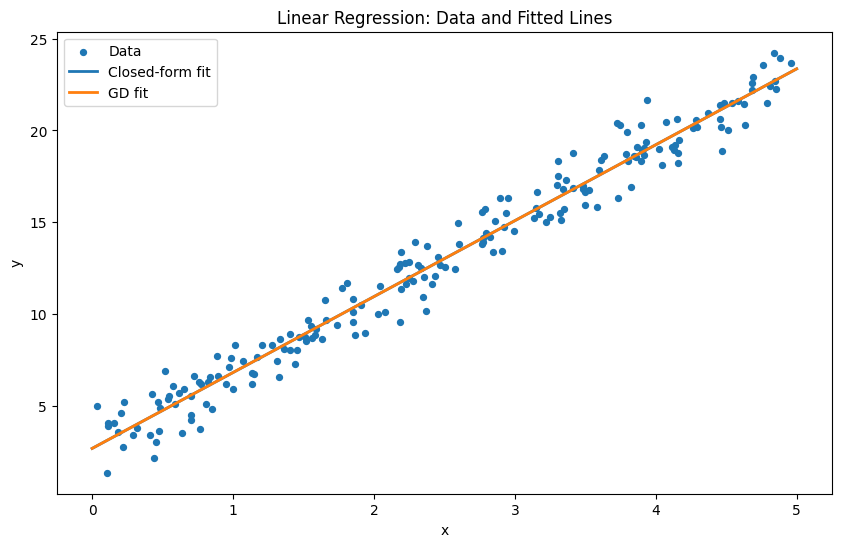

In [ ]:
# Plot raw data + both fitted lines on the SAME figure
x_line = np.linspace(0.0, 5.0, 200)
y_ne_line = intercept_ne + slope_ne * x_line
y_gd_line = intercept_gd + slope_gd * x_line


plt.figure(figsize=(10,6))
plt.scatter(x, y, s=18, label="Data")
plt.plot(x_line, y_ne_line, linewidth=2, label="Closed-form fit")
plt.plot(x_line, y_gd_line, linewidth=2, label="GD fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression: Data and Fitted Lines")
plt.legend()
plt.show()

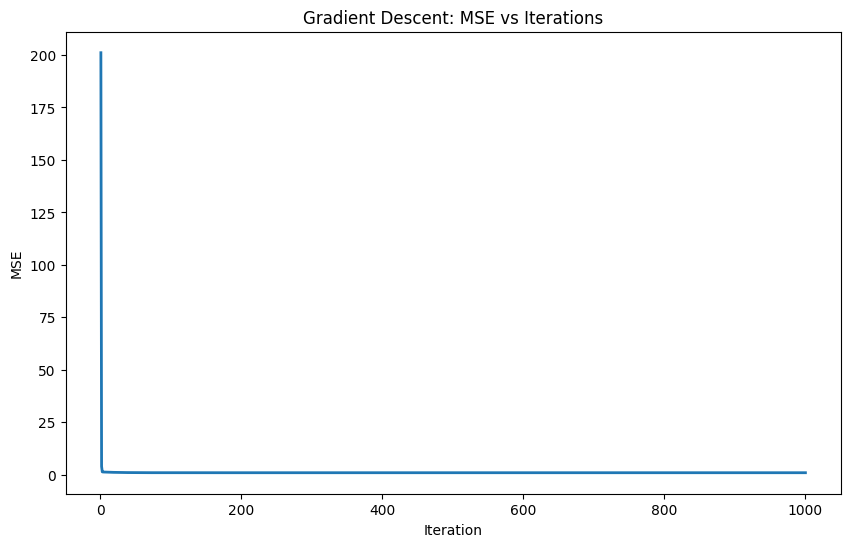

In [ ]:
# Plot MSE vs. iterations (loss curve)
plt.figure(figsize=(10,6))
plt.plot(range(1, iters+1), losses, linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Gradient Descent: MSE vs Iterations")
plt.show()


Both methods recover parameters very close to the ground-truth line $y=3+4x+\varepsilon$ despite the Gaussian noise.
With $\eta=0.05$ and 1000 iterations, gradient descent’s parameters match the Normal Equation solution (overlapping fitted lines), and the MSE curve drops quickly before flattening—evidence of convergence.
Any tiny discrepancy is due to noise and finite-precision/iteration effects.
